In [1]:
import sys

%run tools.py 
from pathlib import Path
import numpy as np
import pandas as pd
import plotly.express as px
import dask.array as da
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
meta = pd.read_csv("../../resources/metadata/samples.meta.csv")
spp= pd.read_csv("../../resources/metadata/samples.meta.spp.csv")

In [28]:
spp.to_csv("../../config/metadata.tsv", sep="\t")

In [25]:
metadata

,sample_id,partner_sample_id,contributor,country,location,location2,year,month,latitude,longitude,sex_call,species_gambiae_coluzzii,District,Ecology,mining,IRS STATUS
0,VBS45187-5563STDY8782450,WA-2001,Alexander Egyir-Yawson,Ghana,Adumanu,Adumanu.House.A,2018,3,6.304,-1.681,F,gambiae,Adansi North,"Forest, farming, Illegal mining open pits",mining,Non-IRS
1,VBS45188-5563STDY8782451,WA-2002,Alexander Egyir-Yawson,Ghana,Adumanu,Adumanu.House.C,2018,10,6.302,-1.682,F,coluzzii,Adansi North,"Forest, farming, Illegal mining open pits",mining,Non-IRS
2,VBS45336-5563STDY8794276,WA-2150,Alexander Egyir-Yawson,Ghana,Adumanu,Adumanu.House.B,2018,11,6.304,-1.682,F,coluzzii,Adansi North,"Forest, farming, Illegal mining open pits",mining,Non-IRS
3,VBS45337-5563STDY8794277,WA-2151,Alexander Egyir-Yawson,Ghana,Adumanu,Adumanu.House.B,2018,11,6.304,-1.682,F,coluzzii,Adansi North,"Forest, farming, Illegal mining open pits",mining,Non-IRS
4,VBS45338-5563STDY8794278,WA-2152,Alexander Egyir-Yawson,Ghana,Adumanu,Adumanu.House.B,2018,11,6.304,-1.682,F,coluzzii,Adansi North,"Forest, farming, Illegal mining open pits",mining,Non-IRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,VBS45532-5563STDY9249457,WA-2346,Alexander Egyir-Yawson,Ghana,Jacobu,Jacobu.House.C,2018,11,6.345,-1.672,F,gambiae,Amansie Central,"Forest, farming, Illegal mining open pits",mining,Non-IRS
481,VBS45533-5563STDY9249458,WA-2347,Alexander Egyir-Yawson,Ghana,Jacobu,Jacobu.House.C,2018,11,6.345,-1.672,F,coluzzii,Amansie Central,"Forest, farming, Illegal mining open pits",mining,Non-IRS
482,VBS45534-5563STDY9249459,WA-2348,Alexander Egyir-Yawson,Ghana,Jacobu,Jacobu.House.C,2018,11,6.345,-1.672,F,coluzzii,Amansie Central,"Forest, farming, Illegal mining open pits",mining,Non-IRS
483,VBS45535-5563STDY9249460,WA-2349,Alexander Egyir-Yawson,Ghana,Jacobu,Jacobu.House.C,2018,11,6.345,-1.672,F,gambiae,Amansie Central,"Forest, farming, Illegal mining open pits",mining,Non-IRS


In [11]:
pcaColumn = ["species_gambiae_coluzzii"]
contig = "3L"
dataset = "gaardian"
genotypePath = f"/home/sanj/projects/gaardian/resources/snp_genotypes/all/1244-VO-GH-YAWSON-VMF00149/{contig}/calldata/GT"
positionsPath = f"/home/sanj/projects/gaardian/resources/snp_genotypes/all/sites/{contig}/variants/POS/"
siteFilterPath = None# snakemake.input['siteFilters'] if not cloud else []

metadata = pd.read_csv("../../config/metadata.tsv", sep="\t")

# Load Arrays
snps, pos = loadZarrArrays(genotypePath, positionsPath, siteFilterPath=siteFilterPath, cloud=False, haplotypes=False, contig=contig)

# Determine cohorts
cohorts = getCohorts(metadata, columns=pcaColumn)


# choose colours for species
species_palette = px.colors.qualitative.Plotly
species_color_map = {
    'gambiae': species_palette[0],
    'coluzzii': species_palette[1],
    'arabiensis': species_palette[2],
    'intermediate_gambiae_coluzzii': species_palette[3],
    'intermediate_arabiensis_gambiae': species_palette[4],
}


In [14]:
results_dir = "../../results/PCA/data/"

In [15]:

# Run PCA on whole dataset together
data, evr = run_pca(contig=contig, gt=snps, pos=pos, df_samples=metadata,
    sample_sets=dataset, results_dir=results_dir
)
evr = evr.astype("float").round(4) # round decimals for variance explained % 

plot_coords(data, evr, title=f" PCA | {dataset} | {contig}", filename=f"results/PCA/{dataset}.{contig}.html")

fig = plt.figure(figsize=(10, 10))
fig = sns.scatterplot('PC1','PC2', data=data, hue=pcaColumn)
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(f"PCA | {dataset} | {contig}", fontsize=14)
plt.xlabel(f"PC1 ({evr[0]*100} % variance explained)", fontdict={"fontsize":14})
plt.ylabel(f"PC2 ({evr[1]*100} % variance explained)", fontdict={"fontsize":14})
plt.savefig(f"results/PCA/{dataset}.{contig}.png")

running analysis: 1367248e7f050d44872b305cb5097b06
setting up inputs
locating segregating sites within desired frequency range
preparing PCA input data
running PCA
saved results: 1367248e7f050d44872b305cb5097b06


FileNotFoundError: [Errno 2] No such file or directory: 'results/PCA/gaardian.3L.html'

In [17]:
evr

array([0.0227, 0.005 , 0.0046, 0.0039, 0.0038, 0.0037, 0.0036, 0.0035,
       0.0034, 0.0034])

FileNotFoundError: [Errno 2] No such file or directory: 'results/PCA/gaardian.3L.png'

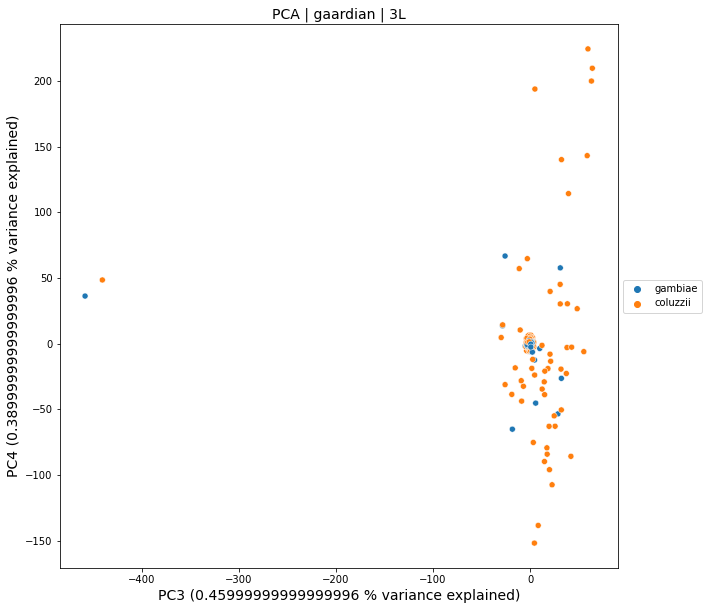

In [21]:
fig = plt.figure(figsize=(10, 10))
fig = sns.scatterplot(x='PC3',y='PC4', data=data, hue='species_gambiae_coluzzii')
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(f"PCA | {dataset} | {contig}", fontsize=14)
plt.xlabel(f"PC3 ({evr[2]*100} % variance explained)", fontdict={"fontsize":14})
plt.ylabel(f"PC4 ({evr[3]*100} % variance explained)", fontdict={"fontsize":14})
plt.savefig(f"results/PCA/{dataset}.{contig}.png")